In [1]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [2]:
# let's read in our stock data...
# 
# 
filename = 'stock_prices.csv'
df = pd.read_csv(filename)        # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")

stock_prices.csv : file read into a pandas dataframe.


In [3]:
#
# a dataframe is a "spreadsheet in Python"   (seems to have an extra column!)
#
# let's view it!
df.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [59]:
df.tail()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098
2332530,20211203_9997,2021-12-03,9997,690.0,711.0,686.0,696.0,381100,1.0,NaN,False,0.018414


In [4]:
#
# let's look at the dataframe's "info":
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
RowId               object
Date                object
SecuritiesCode      int64
Open                float64
High                float64
Low                 float64
Close               float64
Volume              int64
AdjustmentFactor    float64
ExpectedDividend    float64
SupervisionFlag     bool
Target              float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 198.0+ MB


In [5]:
# Let's look at the dataframe's columns:
df.columns

Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')

In [6]:
# we can drop a series of data (a row or a column)
# they're indicated by numeric value, row~0, col~1, but let's use readable names instead:
ROW = 0
COLUMN = 1

df_clean1 = df.drop(['RowId', 'SecuritiesCode', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag'], axis=COLUMN)
df_clean1.head()

# df_clean1 is a new dataframe, without that unwanted column

,Date,Open,High,Low,Close,Volume,Target
0,2017-01-04,2734.0,2755.0,2730.0,2742.0,31400,0.000730
1,2017-01-04,568.0,576.0,563.0,571.0,2798500,0.012324
2,2017-01-04,3150.0,3210.0,3140.0,3210.0,270800,0.006154
3,2017-01-04,1510.0,1550.0,1510.0,1550.0,11300,0.011053
4,2017-01-04,3270.0,3350.0,3270.0,3330.0,150800,0.003026


In [7]:
#
# let's drop _all_ rows with data that is missing/NaN (not-a-number)
df_clean2 = df_clean1.dropna()
df_clean2.info()  # print the info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324923 entries, 0 to 2332530
Data columns (total 7 columns):
Date      object
Open      float64
High      float64
Low       float64
Close     float64
Volume    int64
Target    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 141.9+ MB


In [8]:
# Change Date from object to date

df_clean2["Date"] = pd.to_datetime(df_clean2["Date"])
df_clean2.head()

/Users/jason/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Open,High,Low,Close,Volume,Target
0,2017-01-04,2734.0,2755.0,2730.0,2742.0,31400,0.000730
1,2017-01-04,568.0,576.0,563.0,571.0,2798500,0.012324
2,2017-01-04,3150.0,3210.0,3140.0,3210.0,270800,0.006154
3,2017-01-04,1510.0,1550.0,1510.0,1550.0,11300,0.011053
4,2017-01-04,3270.0,3350.0,3270.0,3330.0,150800,0.003026


In [9]:
# Add Date features to the data

df_clean2["Year"] = df_clean2["Date"].dt.year
df_clean2["Month"] = df_clean2["Date"].dt.month
df_clean2["Day"] = df_clean2["Date"].dt.day

df_clean2.head()

/Users/jason/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jason/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/jason/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,Date,Open,High,Low,Close,Volume,Target,Year,Month,Day
0,2017-01-04,2734.0,2755.0,2730.0,2742.0,31400,0.000730,2017,1,4
1,2017-01-04,568.0,576.0,563.0,571.0,2798500,0.012324,2017,1,4
2,2017-01-04,3150.0,3210.0,3140.0,3210.0,270800,0.006154,2017,1,4
3,2017-01-04,1510.0,1550.0,1510.0,1550.0,11300,0.011053,2017,1,4
4,2017-01-04,3270.0,3350.0,3270.0,3330.0,150800,0.003026,2017,1,4


In [10]:
#Drop Date Column

df_clean3 = df_clean2.drop(['Date'], axis=COLUMN)
df_clean3.head()

,Open,High,Low,Close,Volume,Target,Year,Month,Day
0,2734.0,2755.0,2730.0,2742.0,31400,0.000730,2017,1,4
1,568.0,576.0,563.0,571.0,2798500,0.012324,2017,1,4
2,3150.0,3210.0,3140.0,3210.0,270800,0.006154,2017,1,4
3,1510.0,1550.0,1510.0,1550.0,11300,0.011053,2017,1,4
4,3270.0,3350.0,3270.0,3330.0,150800,0.003026,2017,1,4


In [11]:
df_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324923 entries, 0 to 2332530
Data columns (total 9 columns):
Open      float64
High      float64
Low       float64
Close     float64
Volume    int64
Target    float64
Year      int64
Month     int64
Day       int64
dtypes: float64(5), int64(4)
memory usage: 177.4 MB


In [47]:
# Covert target to two category
# Positive and Negative

def convert_rate(rate):
    """ return the positive and nagative  """

    if rate > 0:
        return 1
    else: return 0

In [48]:
#
# we can "apply" to a whole column and create a new column
#   it may give a warning, but this is ok...
#

df_clean4 = df_clean3.copy()  # copy everything AND...

# add a new column, 'irisnum'
df_clean4['twoclass'] = df_clean3['Target'].apply(convert_rate)

# let's see...
df_clean4.head()

,Open,High,Low,Close,Volume,Target,Year,Month,Day,twoclass
0,2734.0,2755.0,2730.0,2742.0,31400,0.000730,2017,1,4,1
1,568.0,576.0,563.0,571.0,2798500,0.012324,2017,1,4,1
2,3150.0,3210.0,3140.0,3210.0,270800,0.006154,2017,1,4,1
3,1510.0,1550.0,1510.0,1550.0,11300,0.011053,2017,1,4,1
4,3270.0,3350.0,3270.0,3330.0,150800,0.003026,2017,1,4,1


<AxesSubplot:>

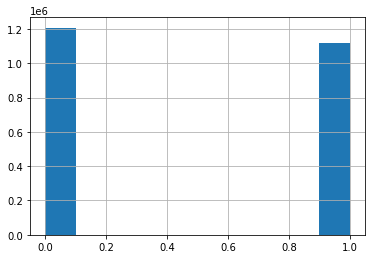

In [49]:
# Let's see amount of the two categories

df_clean4.twoclass.hist()

In [54]:
# Exact number of each class

df_clean4.groupby('twoclass').count()

,Open,High,Low,Close,Volume,Target,Year,Month,Day
twoclass,,,,,,,,,
0,1206791,1206791,1206791,1206791,1206791,1206791,1206791,1206791,1206791
1,1118132,1118132,1118132,1118132,1118132,1118132,1118132,1118132,1118132


In [50]:
# Covert target to ten category

def convert_rate_multiclass(rate):
    """ return the classes  """

    if rate < -0.025:
        return 0
    elif rate >= -0.025 and rate < -0.015:
        return 1
    elif rate >= -0.015 and rate < -0.01:
        return 2
    elif rate >= -0.01 and rate < -0.005:
        return 3
    elif rate >= -0.005 and rate <= 0:
        return 4
    elif rate > 0 and rate < 0.005:
        return 5
    elif rate >= 0.005 and rate < 0.01:
        return 6
    elif rate >= 0.01 and rate < 0.015:
        return 7
    elif rate >= 0.015 and rate < 0.025:
        return 8
    else: return 9

In [51]:
#
# we can "apply" to a whole column and create a new column
#   it may give a warning, but this is ok...
#

df_clean5 = df_clean4.copy()  # copy everything AND...

# add a new column, 'irisnum'
df_clean5['multiclasses'] = df_clean4['Target'].apply(convert_rate_multiclass)

# let's see...
df_clean5.head()

,Open,High,Low,Close,Volume,Target,Year,Month,Day,twoclass,multiclasses
0,2734.0,2755.0,2730.0,2742.0,31400,0.000730,2017,1,4,1,5
1,568.0,576.0,563.0,571.0,2798500,0.012324,2017,1,4,1,7
2,3150.0,3210.0,3140.0,3210.0,270800,0.006154,2017,1,4,1,6
3,1510.0,1550.0,1510.0,1550.0,11300,0.011053,2017,1,4,1,7
4,3270.0,3350.0,3270.0,3330.0,150800,0.003026,2017,1,4,1,5


<AxesSubplot:>

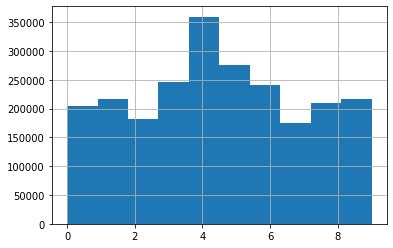

In [52]:
# Let's see amount of the two categories

df_clean5.multiclasses.hist()

In [58]:
# Exact number of each class

df_clean5.groupby('multiclasses').count()

,Open,High,Low,Close,Volume,Target,Year,Month,Day,twoclass
multiclasses,,,,,,,,,,
0,204546,204546,204546,204546,204546,204546,204546,204546,204546,204546
1,216892,216892,216892,216892,216892,216892,216892,216892,216892,216892
2,180955,180955,180955,180955,180955,180955,180955,180955,180955,180955
3,245183,245183,245183,245183,245183,245183,245183,245183,245183,245183
4,359215,359215,359215,359215,359215,359215,359215,359215,359215,359215
5,274870,274870,274870,274870,274870,274870,274870,274870,274870,274870
6,241195,241195,241195,241195,241195,241195,241195,241195,241195,241195
7,175423,175423,175423,175423,175423,175423,175423,175423,175423,175423
8,209517,209517,209517,209517,209517,209517,209517,209517,209517,209517


In [53]:
#
# That's it!  Then, and write it out to stocks_cleaned.csv

# We'll construct the new filename:
cleaned_filename = "stocks_cleaned.csv"  # name-creating
print(f"cleaned_filename is {cleaned_filename}")

# Now, save
df_clean5.to_csv(cleaned_filename, index_label=False)  # no "index" column...

cleaned_filename is stocks_cleaned.csv


In [ ]:
# 0:30W, 0.005:20W, 0.01:20W, 0.015:20W, 0.025:20W

In [ ]:
# <0:40W (0=8W) -0.005:20W, -0.01:20W, -0.015:20W, -0.025:20W

In [ ]:
# Output positive or negative (every day's data) KNN, Neural Network, Random Forest, decision tree

In [ ]:
# Change: Add Date Data

In [ ]:
# Output classes (every day's data) KNN, Neural Network, Random Forest, decision tree

In [ ]:
# Change: Balance

In [ ]:
# Output target (every day's data) KNN, Neural Network, Random Forest, decision tree